In [1]:
import os

# Define the directory path
directory = "./omarmomen/sf_babylm_1/"

# Iterate through all the subdirectories and files
for root, dirs, files in os.walk(directory):
    print(root, dirs, files)
    for file in files:
        # Check if the file name is not "eval_results.json"
        print(file)
        if file != "eval_results.json":
            # Construct the file path
            file_path = os.path.join(root, file)
            # Delete the file
            os.remove(file_path)


./omarmomen/sf_babylm_1/ ['zeroshot', 'finetune'] []
./omarmomen/sf_babylm_1/zeroshot ['control_raising', 'ellipsis', 'binding', 'island_effects', 'irregular_forms', 'determiner_noun_agreement', 'qa_congruence_easy', 'anaphor_agreement', 'argument_structure', 'turn_taking', 'qa_congruence_tricky', 'npi_licensing', 'hypernym', 'filler_gap', 'subject_aux_inversion', 'subject_verb_agreement', 'quantifiers'] []
./omarmomen/sf_babylm_1/zeroshot/control_raising [] ['eval_results.json']
eval_results.json
./omarmomen/sf_babylm_1/zeroshot/ellipsis [] ['eval_results.json']
eval_results.json
./omarmomen/sf_babylm_1/zeroshot/binding [] ['eval_results.json']
eval_results.json
./omarmomen/sf_babylm_1/zeroshot/island_effects [] ['eval_results.json']
eval_results.json
./omarmomen/sf_babylm_1/zeroshot/irregular_forms [] ['eval_results.json']
eval_results.json
./omarmomen/sf_babylm_1/zeroshot/determiner_noun_agreement [] ['eval_results.json']
eval_results.json
./omarmomen/sf_babylm_1/zeroshot/qa_congrue

In [2]:
import pandas as pd
import os
import json

In [2]:
df = pd.read_json('strict_small.json')

In [3]:
df[df.model_id == 1361].iloc[0].metadata_json

'{"perf": 0.640387275242047, "pretty_perf": "0.640387275242047 %", "fairness": 0, "robustness": 0, "mid": 1361, "r_realid": 67, "did": 289, "memory_utilization": 0, "examples_per_second": 0, "new_accuracy": 0.640387275242047, "task": "glue", "sub_task": "boolq"}'

In [4]:
published_model_ids = set(df[df.is_published==1].model_id.tolist())

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   model_id         7328 non-null   int64  
 1   model_name       7328 non-null   object 
 2   shortname        7328 non-null   object 
 3   upload_datetime  7328 non-null   object 
 4   is_published     7328 non-null   int64  
 5   task_name        7328 non-null   object 
 6   score_id         7328 non-null   int64  
 7   performance      7328 non-null   float64
 8   metadata_json    7328 non-null   object 
 9   user_id          7328 non-null   int64  
 10  username         7328 non-null   object 
 11  email            7328 non-null   object 
 12  dataset_id       7328 non-null   int64  
 13  dataset_name     7328 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 801.6+ KB


In [6]:
data = {'perf': 0.6721991701244814, 'pretty_perf': '0.6721991701244814 %', 'fairness': 0, 'robustness': 0, 'mid': 1286, 'r_realid': 67, 'did': 289, 'memory_utilization': 0, 'examples_per_second': 0, 'new_accuracy': 0.6721991701244814, 'task': 'glue', 'sub_task': 'boolq'}

for key, value in data.items():
    print(f"{key}: {value}")


perf: 0.6721991701244814
pretty_perf: 0.6721991701244814 %
fairness: 0
robustness: 0
mid: 1286
r_realid: 67
did: 289
memory_utilization: 0
examples_per_second: 0
new_accuracy: 0.6721991701244814
task: glue
sub_task: boolq


In [7]:
all_records = {
    "boolq": [],
    "cola": [],
    "mnli": [],
    "mnli-mm": [],
    "mrpc": [],
    "multirc": [],
    "qnli": [],
    "qqp": [],
    "rte": [],
    "sst2": [],
    "wsc": [],
    "anaphor_agreement": [],
    "argument_structure": [],
    "binding": [],
    "control_raising": [],
    "determiner_noun_agreement": [],
    "ellipsis": [],
    "filler_gap": [],
    "irregular_forms": [],
    "island_effects": [],
    "npi_licensing": [],
    "quantifiers": [],
    "subject_verb_agreement": [],
    "hypernym": [],
    "qa_congruence_easy": [],
    "qa_congruence_tricky": [],
    "subject_aux_inversion": [],
    "turn_taking": [],
    "control_raising_control": [],
    "control_raising_lexical_content_the": [],
    "control_raising_relative_token_position": [],
    "lexical_content_the_control": [],
    "main_verb_control": [],
    "main_verb_lexical_content_the": [],
    "main_verb_relative_token_position": [],
    "relative_position_control": [],
    "syntactic_category_control": [],
    "syntactic_category_lexical_content_the": [],
    "syntactic_category_relative_position": []
}

In [8]:
glue = list(all_records.keys())[:11]
blimp = list(all_records.keys())[11:28]
msgs = list(all_records.keys())[28:]

In [9]:
models_ids = []
for model_id in published_model_ids:
    model_records_df = df[df.model_id == model_id]
    if len(model_records_df) == 56:
        models_ids.append(model_id)
        for record in model_records_df.iterrows():
            record_dict = eval(record[1].metadata_json)
            if record_dict['task'] == 'msgs' and record_dict['did'] != 303:
                continue
            all_records[record_dict['sub_task']].append(record_dict['perf'])

In [10]:
len(models_ids)

117

In [11]:
for task in all_records:
    print(f"{task}: {len(all_records[task])}")

boolq: 117
cola: 117
mnli: 117
mnli-mm: 117
mrpc: 117
multirc: 117
qnli: 117
qqp: 117
rte: 117
sst2: 117
wsc: 117
anaphor_agreement: 117
argument_structure: 117
binding: 117
control_raising: 117
determiner_noun_agreement: 117
ellipsis: 117
filler_gap: 117
irregular_forms: 117
island_effects: 117
npi_licensing: 117
quantifiers: 117
subject_verb_agreement: 117
hypernym: 117
qa_congruence_easy: 117
qa_congruence_tricky: 117
subject_aux_inversion: 117
turn_taking: 117
control_raising_control: 117
control_raising_lexical_content_the: 117
control_raising_relative_token_position: 117
lexical_content_the_control: 117
main_verb_control: 117
main_verb_lexical_content_the: 117
main_verb_relative_token_position: 117
relative_position_control: 117
syntactic_category_control: 117
syntactic_category_lexical_content_the: 117
syntactic_category_relative_position: 117


In [12]:
blimp_ag = []
glue_ag = []
msgs_ag = []
total_ag = []

for i in range(117):
    blimps = []
    for subtask in blimp:
        blimps.append(all_records[subtask][i])
    bavg = sum(blimps) / len(blimps)
    
    glues = []
    for subtask in glue:
        glues.append(all_records[subtask][i])
    gavg = sum(glues) / len(glues)
        
    msgss = []
    for subtask in msgs:
        msgss.append(all_records[subtask][i])
    mavg = sum(msgss) / len(msgss)
    
    total = (bavg*0.5 + gavg*0.3 + mavg*0.2)
    blimp_ag.append(bavg)
    glue_ag.append(gavg)
    msgs_ag.append(mavg)
    total_ag.append(total)

In [13]:
len(blimp_ag), len(glue_ag), len(msgs_ag), len(total_ag)

(117, 117, 117, 117)

In [14]:
all_records['blimp_ag'] = blimp_ag
all_records['glue_ag'] = glue_ag
all_records['msgs_ag'] = msgs_ag
all_records['total_ag'] = total_ag
all_records['model_id'] = models_ids

In [15]:
# BliMP = blimp + supplement = 17 metrics
# To get them, get value in "eval_accuracy" in eval_results.json file in each subtask folder

# SuperGLUE = 11 metrics
# To get them, get value in "eval_accuracy" in eval_results.json file in each subtask folder
# except for cola, which is "eval_mcc"
# and for mrpc, which is "eval_f1"
# and for qqp, which is "eval_f1"

# MSGS = 11 metrics
# To get them, get value in "eval_mcc" in eval_results.json file in each subtask folder

In [16]:
all_records['model_id'].append(10000) # tf

blimps = []
for task in blimp:
    file_path = os.path.join('omarmomen', 'tf_babylm_1', 'zeroshot', task, 'eval_results.json')
    with open(file_path, 'r') as file:
        content = json.load(file)
    all_records[task].append(content['eval_accuracy'])
    blimps.append(content['eval_accuracy'])
bavg = sum(blimps) / len(blimps)
all_records['blimp_ag'].append(bavg)

glues = []
for task in glue:
    file_path = os.path.join('omarmomen', 'tf_babylm_1', 'finetune', task, 'eval_results.json')
    with open(file_path, 'r') as file:
        content = json.load(file)
    if task == 'cola':
        all_records[task].append(content['eval_mcc'])
        glues.append(content['eval_mcc'])
    elif task == 'mrpc' or task == 'qqp':
        all_records[task].append(content['eval_f1'])
        glues.append(content['eval_f1'])
    else:
        all_records[task].append(content['eval_accuracy'])
        glues.append(content['eval_accuracy'])
gavg = sum(glues) / len(glues)
all_records['glue_ag'].append(gavg)

msgss = []
for task in msgs:
    file_path = os.path.join('omarmomen', 'tf_babylm_1', 'finetune', task, 'eval_results.json')
    with open(file_path, 'r') as file:
        content = json.load(file)
    all_records[task].append(content['eval_mcc'])
    msgss.append(content['eval_mcc'])
mavg = sum(msgss) / len(msgss)
all_records['msgs_ag'].append(mavg)

tag = 0.5*bavg + 0.3*gavg + 0.2*mavg
all_records['total_ag'].append(tag)


In [17]:
all_records['model_id'].append(20000) # sf

blimps = []
for task in blimp:
    file_path = os.path.join('omarmomen', 'sf_babylm_1', 'zeroshot', task, 'eval_results.json')
    with open(file_path, 'r') as file:
        content = json.load(file)
    all_records[task].append(content['eval_accuracy'])
    blimps.append(content['eval_accuracy'])
bavg = sum(blimps) / len(blimps)
all_records['blimp_ag'].append(bavg)

glues = []
for task in glue:
    file_path = os.path.join('omarmomen', 'sf_babylm_1', 'finetune', task, 'eval_results.json')
    with open(file_path, 'r') as file:
        content = json.load(file)
    if task == 'cola':
        all_records[task].append(content['eval_mcc'])
        glues.append(content['eval_mcc'])
    elif task == 'mrpc' or task == 'qqp':
        all_records[task].append(content['eval_f1'])
        glues.append(content['eval_f1'])
    else:
        all_records[task].append(content['eval_accuracy'])
        glues.append(content['eval_accuracy'])
gavg = sum(glues) / len(glues)
all_records['glue_ag'].append(gavg)

msgss = []
for task in msgs:
    file_path = os.path.join('omarmomen', 'sf_babylm_1', 'finetune', task, 'eval_results.json')
    with open(file_path, 'r') as file:
        content = json.load(file)
    all_records[task].append(content['eval_mcc'])
    msgss.append(content['eval_mcc'])
mavg = sum(msgss) / len(msgss)
all_records['msgs_ag'].append(mavg)

tag = 0.5*bavg + 0.3*gavg + 0.2*mavg
all_records['total_ag'].append(tag)


In [18]:
all_records['model_id'].append(30000) # sf_ip

blimps = []
for task in blimp:
    file_path = os.path.join('omarmomen', 'sf_ip_babylm_1', 'zeroshot', task, 'eval_results.json')
    with open(file_path, 'r') as file:
        content = json.load(file)
    all_records[task].append(content['eval_accuracy'])
    blimps.append(content['eval_accuracy'])
bavg = sum(blimps) / len(blimps)
all_records['blimp_ag'].append(bavg)

glues = []
for task in glue:
    file_path = os.path.join('omarmomen', 'sf_ip_babylm_1', 'finetune', task, 'eval_results.json')
    with open(file_path, 'r') as file:
        content = json.load(file)
    if task == 'cola':
        all_records[task].append(content['eval_mcc'])
        glues.append(content['eval_mcc'])
    elif task == 'mrpc' or task == 'qqp':
        all_records[task].append(content['eval_f1'])
        glues.append(content['eval_f1'])
    else:
        all_records[task].append(content['eval_accuracy'])
        glues.append(content['eval_accuracy'])
gavg = sum(glues) / len(glues)
all_records['glue_ag'].append(gavg)

msgss = []
for task in msgs:
    file_path = os.path.join('omarmomen', 'sf_ip_babylm_1', 'finetune', task, 'eval_results.json')
    with open(file_path, 'r') as file:
        content = json.load(file)
    all_records[task].append(content['eval_mcc'])
    msgss.append(content['eval_mcc'])
mavg = sum(msgss) / len(msgss)
all_records['msgs_ag'].append(mavg)

tag = 0.5*bavg + 0.3*gavg + 0.2*mavg
all_records['total_ag'].append(tag)

In [19]:
len(all_records['model_id']), len(all_records['blimp_ag']), len(all_records['glue_ag']), len(all_records['msgs_ag']), len(all_records['total_ag'])

(120, 120, 120, 120, 120)

In [20]:
final_babylm_results_df = pd.DataFrame(all_records)

In [21]:
final_babylm_results_df = final_babylm_results_df[['model_id', 'blimp_ag', 'glue_ag', 'msgs_ag', 'total_ag', 'boolq', 'cola', 'mnli', 'mnli-mm', 'mrpc', 'multirc', 'qnli', 'qqp', 'rte', 'sst2', 'wsc', 'anaphor_agreement', 'argument_structure', 'binding', 'control_raising', 'determiner_noun_agreement', 'ellipsis', 'filler_gap', 'irregular_forms', 'island_effects', 'npi_licensing', 'quantifiers', 'subject_verb_agreement', 'hypernym', 'qa_congruence_easy', 'qa_congruence_tricky', 'subject_aux_inversion', 'turn_taking', 'control_raising_control', 'control_raising_lexical_content_the', 'control_raising_relative_token_position', 'lexical_content_the_control', 'main_verb_control', 'main_verb_lexical_content_the', 'main_verb_relative_token_position', 'relative_position_control', 'syntactic_category_control', 'syntactic_category_lexical_content_the', 'syntactic_category_relative_position']]

In [22]:
final_babylm_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   model_id                                 120 non-null    int64  
 1   blimp_ag                                 120 non-null    float64
 2   glue_ag                                  120 non-null    float64
 3   msgs_ag                                  120 non-null    float64
 4   total_ag                                 120 non-null    float64
 5   boolq                                    120 non-null    float64
 6   cola                                     120 non-null    float64
 7   mnli                                     120 non-null    float64
 8   mnli-mm                                  120 non-null    float64
 9   mrpc                                     120 non-null    float64
 10  multirc                                  120 non-n

In [23]:
final_babylm_results_df.tail()

,model_id,blimp_ag,glue_ag,msgs_ag,total_ag,boolq,cola,mnli,mnli-mm,mrpc,...,control_raising_lexical_content_the,control_raising_relative_token_position,lexical_content_the_control,main_verb_control,main_verb_lexical_content_the,main_verb_relative_token_position,relative_position_control,syntactic_category_control,syntactic_category_lexical_content_the,syntactic_category_relative_position
115,1505,0.663618,0.652036,-0.039037,0.519612,0.629322,0.159819,0.708016,0.721992,0.753968,...,-0.447757,-0.937066,0.997585,0.934076,-1.000000,-0.866013,0.668143,0.622513,-0.613234,-0.323241
116,1506,0.644876,0.653606,-0.013461,0.515828,0.648686,0.262551,0.715635,0.727403,0.749004,...,-0.137666,-0.983721,0.780327,0.984241,-0.999729,-0.945626,0.998895,0.867607,-0.756086,-0.517969
117,10000,0.677898,0.587860,-0.055340,0.504239,0.636238,-0.003519,0.581073,0.592616,0.769231,...,-0.151981,-0.801577,0.482073,0.928144,-0.964549,-0.890019,0.823378,0.478584,-0.598414,-0.607410
118,20000,0.654180,0.613373,-0.035463,0.504009,0.658368,0.130770,0.623133,0.636855,0.773234,...,-0.280121,-0.756555,0.611725,0.977120,-0.949640,-0.787445,0.916503,0.429359,-0.503139,-0.624854
119,30000,0.673304,0.654989,0.096115,0.552372,0.623790,0.267070,0.688510,0.663113,0.773438,...,-0.158063,-0.930112,0.993189,0.992972,-0.084797,-0.608171,0.988513,0.401118,-0.547386,-0.596970


In [24]:
final_babylm_results_df.to_csv('babylm_dynabench_results.csv', index=False)

In [3]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
df = pd.read_csv('babylm_dynabench_results.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   model_id                                 120 non-null    int64  
 1   blimp_ag                                 120 non-null    float64
 2   glue_ag                                  120 non-null    float64
 3   msgs_ag                                  120 non-null    float64
 4   total_ag                                 120 non-null    float64
 5   boolq                                    120 non-null    float64
 6   cola                                     120 non-null    float64
 7   mnli                                     120 non-null    float64
 8   mnli-mm                                  120 non-null    float64
 9   mrpc                                     120 non-null    float64
 10  multirc                                  120 non-n

In [6]:
df.model_id.nunique()

120

In [7]:
blimp_tasks = list(df.columns)[16:33]
blimp_tasks

['anaphor_agreement',
 'argument_structure',
 'binding',
 'control_raising',
 'determiner_noun_agreement',
 'ellipsis',
 'filler_gap',
 'irregular_forms',
 'island_effects',
 'npi_licensing',
 'quantifiers',
 'subject_verb_agreement',
 'hypernym',
 'qa_congruence_easy',
 'qa_congruence_tricky',
 'subject_aux_inversion',
 'turn_taking']

In [8]:
glue_tasks = list(df.columns)[5:16]
glue_tasks

['boolq',
 'cola',
 'mnli',
 'mnli-mm',
 'mrpc',
 'multirc',
 'qnli',
 'qqp',
 'rte',
 'sst2',
 'wsc']

In [9]:
msgs_tasks = list(df.columns)[33:44]
msgs_tasks

['control_raising_control',
 'control_raising_lexical_content_the',
 'control_raising_relative_token_position',
 'lexical_content_the_control',
 'main_verb_control',
 'main_verb_lexical_content_the',
 'main_verb_relative_token_position',
 'relative_position_control',
 'syntactic_category_control',
 'syntactic_category_lexical_content_the',
 'syntactic_category_relative_position']

In [10]:
syntax_tasks = [ 'argument_structure', 'binding',
       'control_raising', 'ellipsis',
       'filler_gap', 'island_effects',
       'qa_congruence_easy', 'qa_congruence_tricky', 'subject_aux_inversion',
       'turn_taking',
       'cola',
        'control_raising_control',
       'control_raising_lexical_content_the',
       'control_raising_relative_token_position',
       'main_verb_control',
       'main_verb_lexical_content_the', 
       'main_verb_relative_token_position',
       'syntactic_category_control',
       'syntactic_category_lexical_content_the',
       'syntactic_category_relative_position'
]

In [11]:
tf_patch = mpatches.Patch(color='red', linestyle='--', label=r'TF')
sf_patch = mpatches.Patch(color='blue', linestyle='--', label=r'SF$_{\mathrm{m=0}}$')
sf_ip_patch = mpatches.Patch(color='green', linestyle='--', label=r'SF$_{\mathrm{m=4}}$')

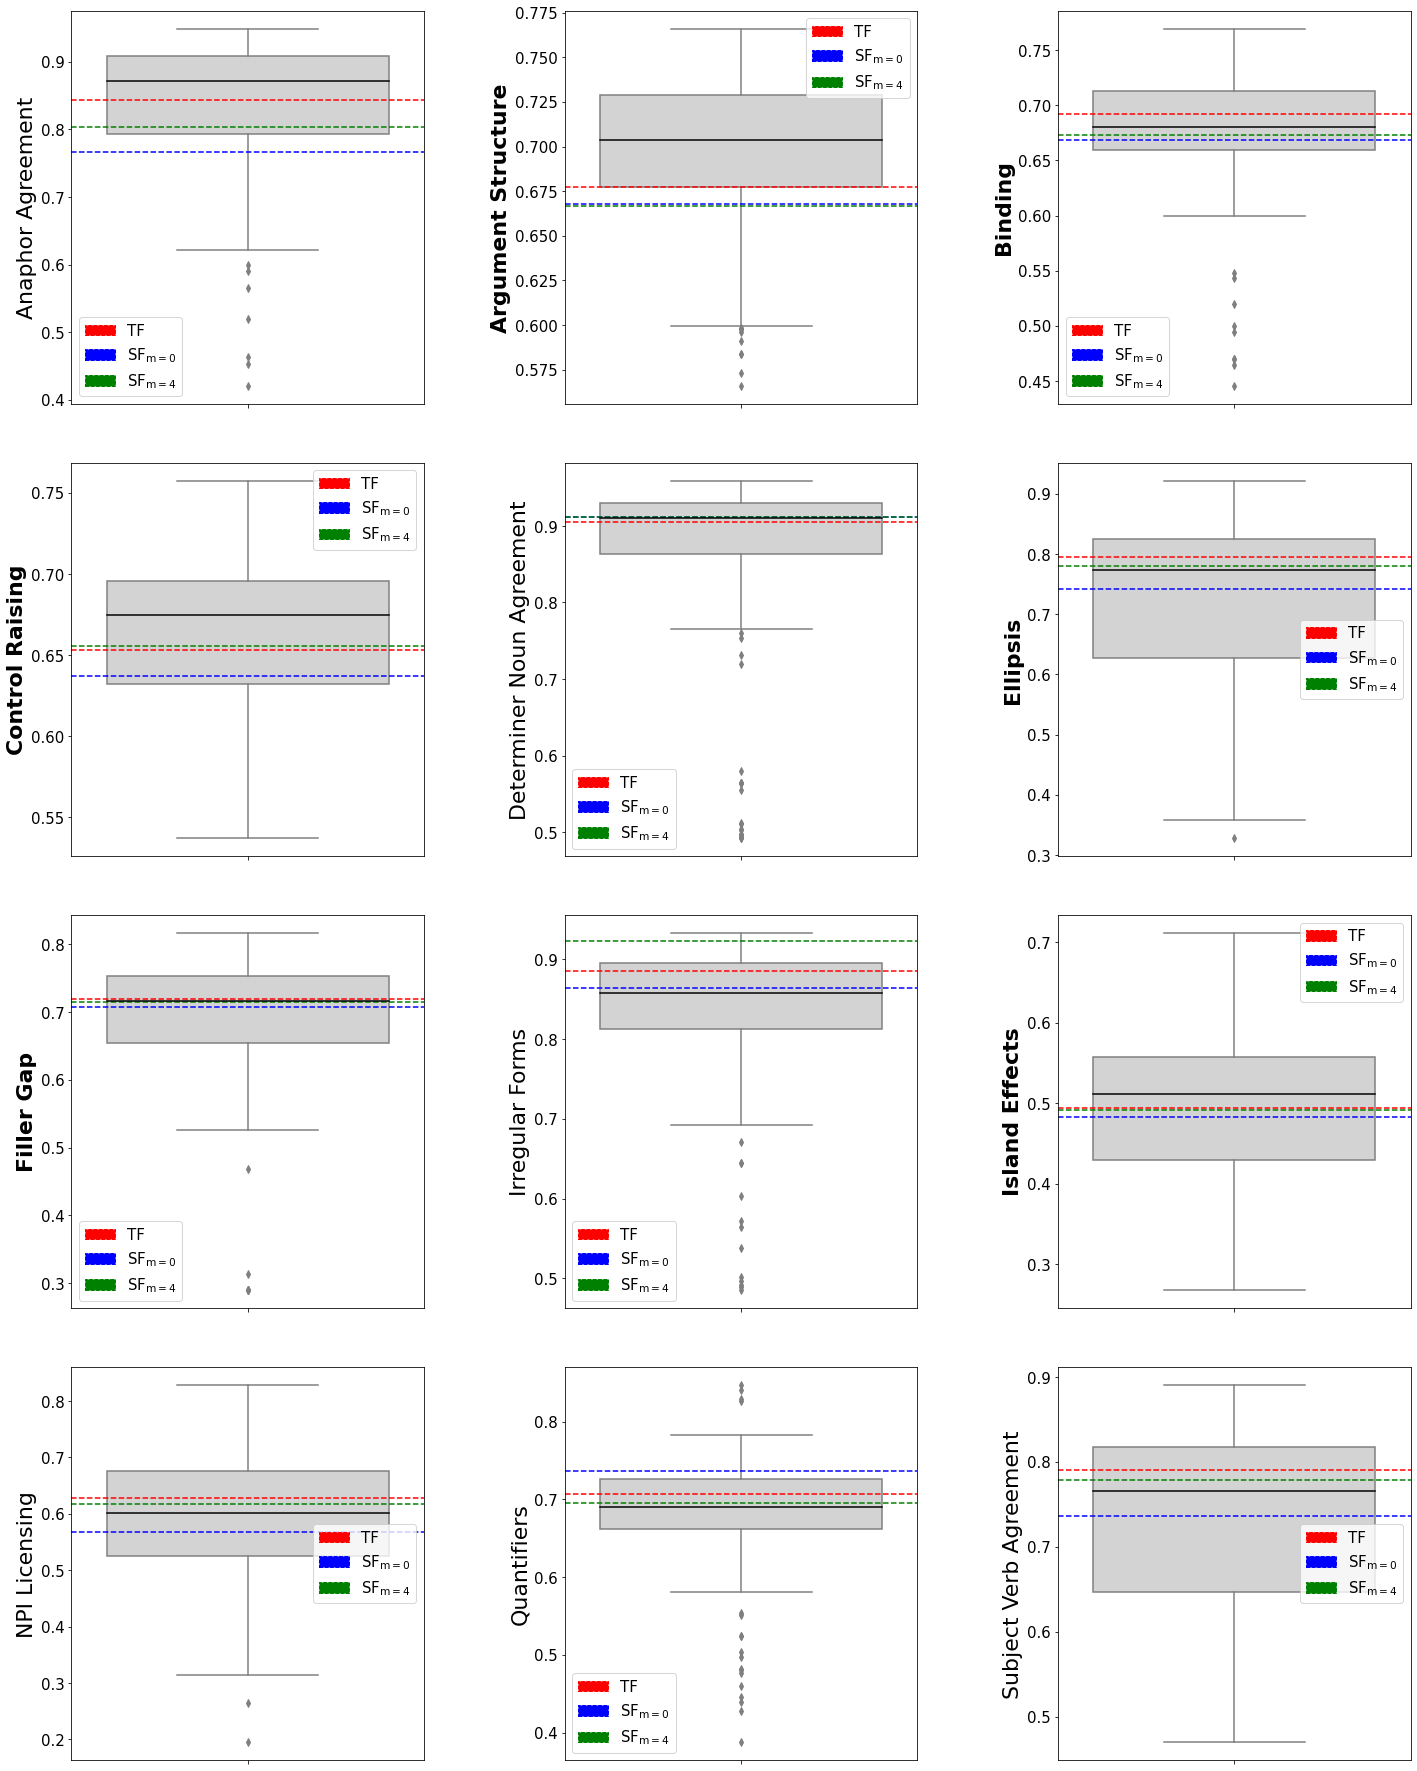

In [12]:
# Plot the boxplot and add legends
plt.figure(figsize=(16*1.5, 27*1.5))

for i, task in enumerate(blimp_tasks[:12]):
    plt.subplot(5, 3, i+1)
    ax = sns.boxplot(data=df[:-3], y=task, color='#D3D3D3', medianprops={'color': 'black'})
    ax.axhline(y=df[task].iloc[-3].item(), color='red', linestyle='--') # tf
    ax.axhline(y=df[task].iloc[-2].item(), color='blue', linestyle='--') # sf
    ax.axhline(y=df[task].iloc[-1].item(), color='green', linestyle='--') # sf_ip
    ax.tick_params(axis='y', labelsize=15)
    ax.legend(handles=[tf_patch, sf_patch, sf_ip_patch], fontsize=15)
    font_weight = 'bold' if df[task].name in syntax_tasks else 'normal'
    if df[task].name.startswith('npi'):
        ax.set_ylabel("NPI Licensing", fontsize=22, fontweight=font_weight)
    else:
        ax.set_ylabel(df[task].name.replace('_', ' ').title(), fontsize=22, fontweight=font_weight) # Increase fontsize
    
plt.subplots_adjust(hspace=0.15, wspace=0.4) # Add space between subplots

plt.show()


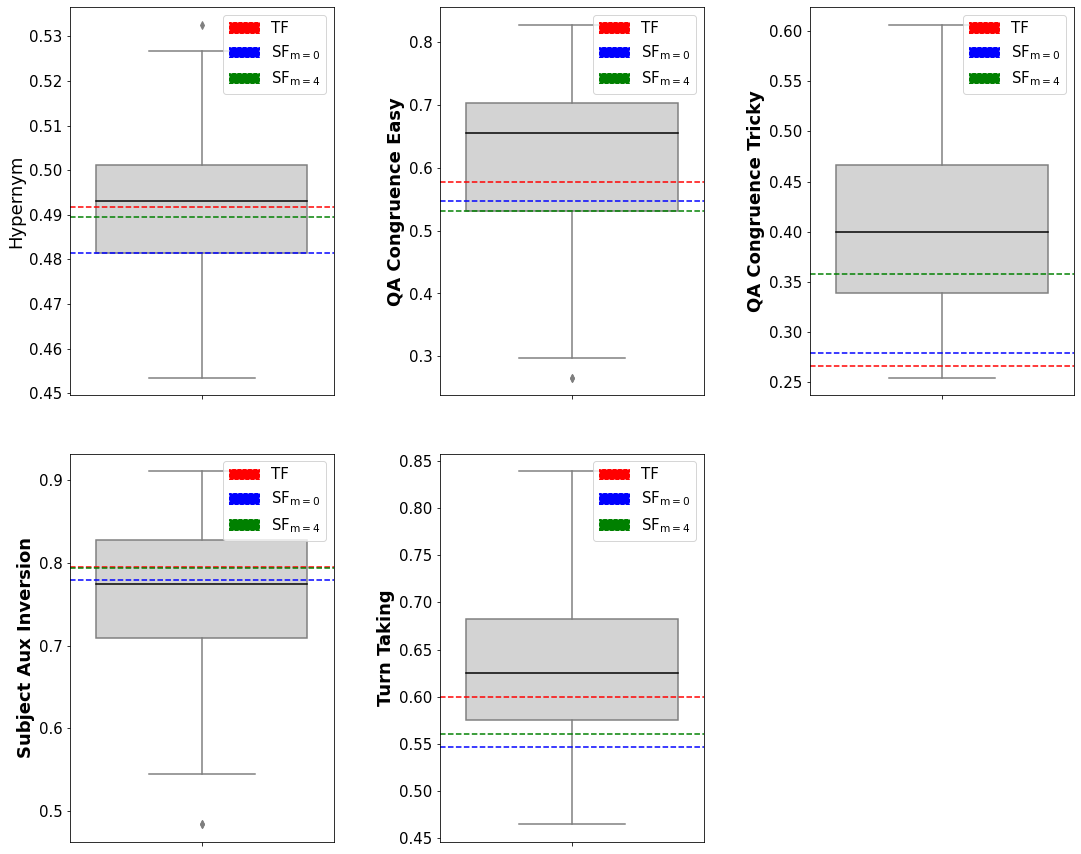

In [13]:
# Plot the boxplot and add legends
plt.figure(figsize=(18*1, 40*1))

for i, task in enumerate(blimp_tasks[12:]):
    plt.subplot(5, 3, i+1)
    ax = sns.boxplot(data=df[:-3], y=task, color='#D3D3D3', medianprops={'color': 'black'})
    ax.axhline(y=df[task].iloc[-3].item(), color='red', linestyle='--') # tf
    ax.axhline(y=df[task].iloc[-2].item(), color='blue', linestyle='--') # sf
    ax.axhline(y=df[task].iloc[-1].item(), color='green', linestyle='--') # sf_ip
    ax.tick_params(axis='y', labelsize=15)
    ax.legend(handles=[tf_patch, sf_patch, sf_ip_patch], loc='upper right', fontsize=15)
    font_weight = 'bold' if df[task].name in syntax_tasks else 'normal'
    if df[task].name.startswith('npi'):
        ax.set_ylabel("NPI Licensing", fontsize=18, fontweight=font_weight)
    elif df[task].name.startswith('qa_congruence_easy'):
        ax.set_ylabel("QA Congruence Easy", fontsize=18, fontweight=font_weight)
    elif df[task].name.startswith('qa_congruence_tricky'):
        ax.set_ylabel("QA Congruence Tricky", fontsize=18, fontweight=font_weight)
    else:
        ax.set_ylabel(df[task].name.replace('_', ' ').title(), fontsize=18, fontweight=font_weight) # Increase fontsize

plt.subplots_adjust(hspace=0.15, wspace=0.4) # Add space between subplots

plt.show()


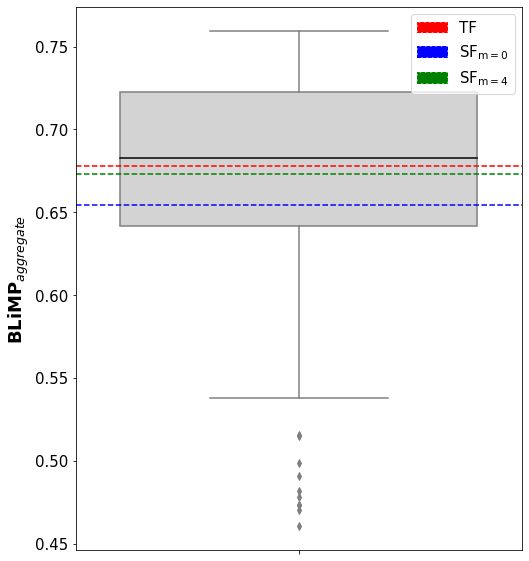

In [14]:
# Plot the boxplot and add legends
plt.figure(figsize=(8*1, 10*1))

task = 'blimp_ag'

ax = sns.boxplot(data=df[:-3], y=task, color='#D3D3D3', medianprops={'color': 'black'})
ax.axhline(y=df[task].iloc[-3].item(), color='red', linestyle='--') # tf
ax.axhline(y=df[task].iloc[-2].item(), color='blue', linestyle='--') # sf
ax.axhline(y=df[task].iloc[-1].item(), color='green', linestyle='--') # sf_ip
ax.tick_params(axis='y', labelsize=15)
ax.legend(handles=[tf_patch, sf_patch, sf_ip_patch], loc='upper right', fontsize=15)

ax.set_ylabel(r'BLiMP$_{aggregate}$', fontsize=18, fontweight=font_weight) # Increase fontsize

#plt.subplots_adjust(hspace=0.15, wspace=0.4) # Add space between subplots

plt.show()


In [15]:
blimp_syntactic_tasks = []
for task in blimp_tasks:
    if task in syntax_tasks:
        blimp_syntactic_tasks.append(task)

In [16]:
df['blimp_syn_avg'] = df[blimp_syntactic_tasks].mean(axis=1)

In [17]:
df

,model_id,blimp_ag,glue_ag,msgs_ag,total_ag,boolq,cola,mnli,mnli-mm,mrpc,...,control_raising_relative_token_position,lexical_content_the_control,main_verb_control,main_verb_lexical_content_the,main_verb_relative_token_position,relative_position_control,syntactic_category_control,syntactic_category_lexical_content_the,syntactic_category_relative_position,blimp_syn_avg
0,1286,0.733727,0.711072,0.071863,0.594558,0.672199,0.422423,0.770649,0.769574,0.837370,...,-0.839402,1.000000,0.999758,-1.000000,-0.601730,0.975572,0.594501,-0.177215,-0.545919,0.719759
1,1287,0.687344,0.673183,0.061948,0.558016,0.677732,0.390369,0.727979,0.741088,0.788104,...,-0.349048,1.000000,0.998060,-0.977750,-0.915880,0.994048,0.431410,-0.599362,-0.508426,0.637996
2,1290,0.723547,0.705711,0.171603,0.607808,0.663900,0.418656,0.759067,0.763208,0.781955,...,-0.566759,1.000000,0.998062,-0.996752,-0.494518,0.961217,0.565784,-0.033034,-0.447405,0.684600
3,1291,0.722950,0.665983,-0.034759,0.554318,0.614108,0.267739,0.708321,0.721038,0.820000,...,-0.978716,0.935483,0.996609,-0.777296,-0.880486,0.980586,0.326097,-0.759030,-0.405672,0.693659
4,1293,0.498753,0.581856,-0.200359,0.383862,0.598893,0.000000,0.623895,0.620146,0.820000,...,-0.951648,1.000000,0.886649,-1.000000,-0.877916,0.995802,0.075245,-1.000000,-0.677588,0.503185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1505,0.663618,0.652036,-0.039037,0.519612,0.629322,0.159819,0.708016,0.721992,0.753968,...,-0.937066,0.997585,0.934076,-1.000000,-0.866013,0.668143,0.622513,-0.613234,-0.323241,0.632692
116,1506,0.644876,0.653606,-0.013461,0.515828,0.648686,0.262551,0.715635,0.727403,0.749004,...,-0.983721,0.780327,0.984241,-0.999729,-0.945626,0.998895,0.867607,-0.756086,-0.517969,0.597295
117,10000,0.677898,0.587860,-0.055340,0.504239,0.636238,-0.003519,0.581073,0.592616,0.769231,...,-0.801577,0.482073,0.928144,-0.964549,-0.890019,0.823378,0.478584,-0.598414,-0.607410,0.627257
118,20000,0.654180,0.613373,-0.035463,0.504009,0.658368,0.130770,0.623133,0.636855,0.773234,...,-0.756555,0.611725,0.977120,-0.949640,-0.787445,0.916503,0.429359,-0.503139,-0.624854,0.605638


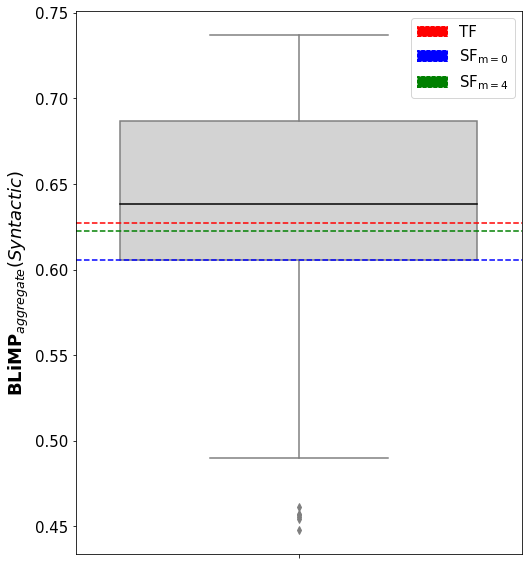

In [18]:
# Plot the boxplot and add legends
plt.figure(figsize=(8*1, 10*1))

task = 'blimp_syn_avg'

ax = sns.boxplot(data=df[:-3], y=task, color='#D3D3D3', medianprops={'color': 'black'})
ax.axhline(y=df[task].iloc[-3].item(), color='red', linestyle='--') # tf
ax.axhline(y=df[task].iloc[-2].item(), color='blue', linestyle='--') # sf
ax.axhline(y=df[task].iloc[-1].item(), color='green', linestyle='--') # sf_ip
ax.tick_params(axis='y', labelsize=15)
ax.legend(handles=[tf_patch, sf_patch, sf_ip_patch], loc='upper right', fontsize=15)

ax.set_ylabel(r'BLiMP$_{aggregate} (Syntactic)$', fontsize=18, fontweight=font_weight) # Increase fontsize

#plt.subplots_adjust(hspace=0.15, wspace=0.4) # Add space between subplots

plt.show()


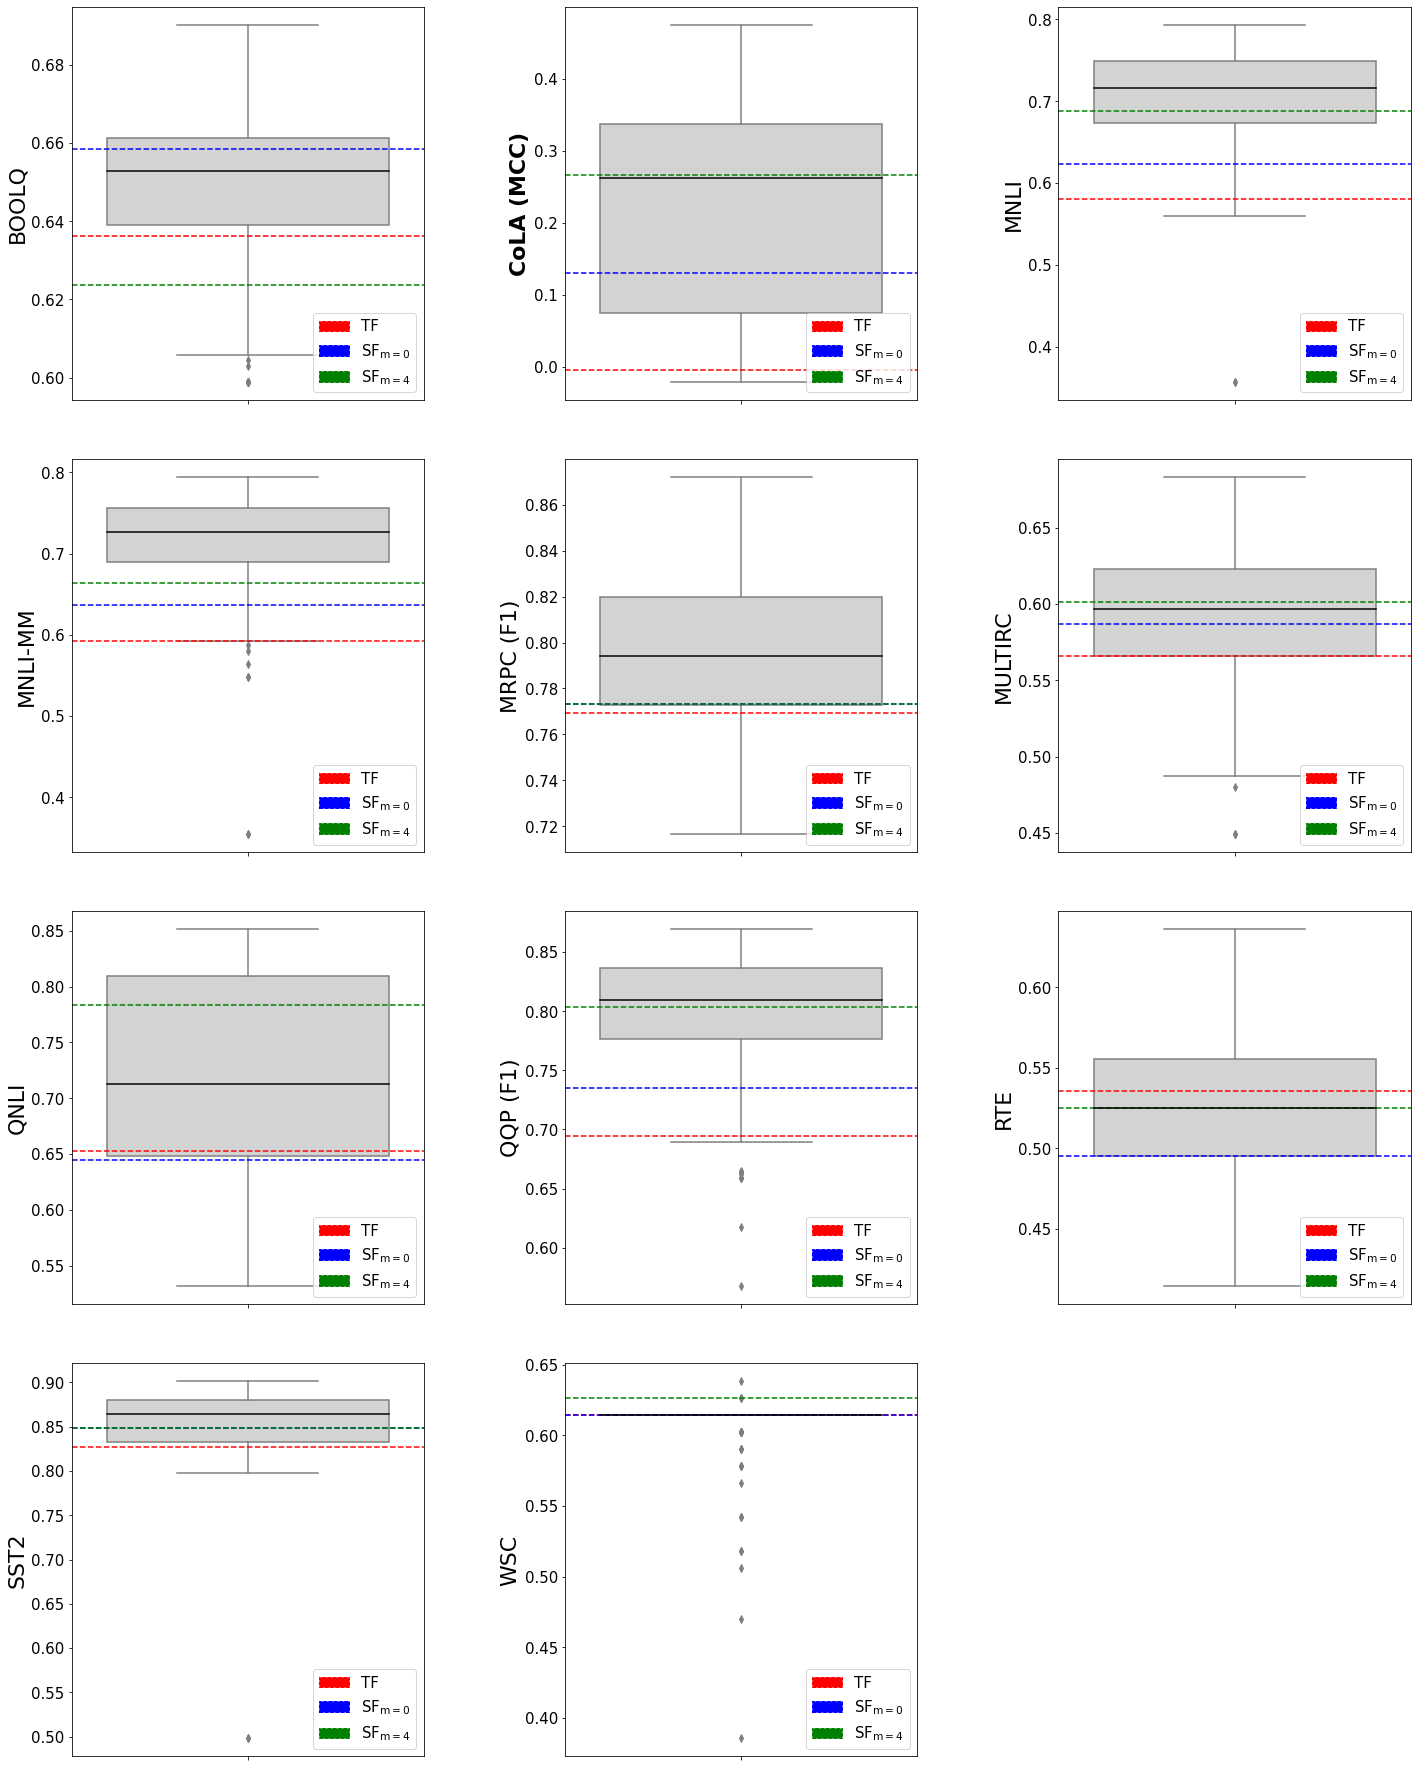

In [19]:
# Plot the boxplot and add legends
plt.figure(figsize=(16*1.5, 27*1.5))

for i, task in enumerate(glue_tasks):
    plt.subplot(5, 3, i+1)
    ax = sns.boxplot(data=df[:-3], y=task, color='#D3D3D3', medianprops={'color': 'black'})
    ax.axhline(y=df[task].iloc[-3].item(), color='red', linestyle='--') # tf
    ax.axhline(y=df[task].iloc[-2].item(), color='blue', linestyle='--') # sf
    ax.axhline(y=df[task].iloc[-1].item(), color='green', linestyle='--') # sf_ip
    ax.tick_params(axis='y', labelsize=15)
    ax.legend(handles=[tf_patch, sf_patch, sf_ip_patch], loc='lower right', fontsize=15)
    font_weight = 'bold' if df[task].name in syntax_tasks else 'normal'
    if df[task].name.startswith('npi'):
        ax.set_ylabel("NPI Licensing", fontsize=22, fontweight=font_weight)
    elif df[task].name.startswith('cola'):
        ax.set_ylabel("CoLA (MCC)", fontsize=22, fontweight=font_weight)
    elif df[task].name.startswith('mrpc'):
        ax.set_ylabel("MRPC (F1)", fontsize=22, fontweight=font_weight)
    elif df[task].name.startswith('qqp'):
        ax.set_ylabel("QQP (F1)", fontsize=22, fontweight=font_weight)
    else:
        ax.set_ylabel(df[task].name.replace('_', ' ').upper(), fontsize=22, fontweight=font_weight) # Increase fontsize

plt.subplots_adjust(hspace=0.15, wspace=0.4) # Add space between subplots

plt.show()


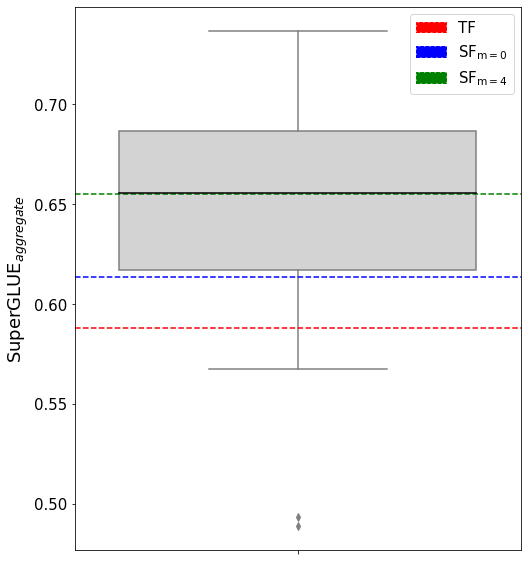

In [20]:
# Plot the boxplot and add legends
plt.figure(figsize=(8*1, 10*1))

task = 'glue_ag'

ax = sns.boxplot(data=df[:-3], y=task, color='#D3D3D3', medianprops={'color': 'black'})
ax.axhline(y=df[task].iloc[-3].item(), color='red', linestyle='--') # tf
ax.axhline(y=df[task].iloc[-2].item(), color='blue', linestyle='--') # sf
ax.axhline(y=df[task].iloc[-1].item(), color='green', linestyle='--') # sf_ip
ax.tick_params(axis='y', labelsize=15)
ax.legend(handles=[tf_patch, sf_patch, sf_ip_patch], loc='upper right', fontsize=15)

ax.set_ylabel(r'SuperGLUE$_{aggregate}$', fontsize=18, fontweight=font_weight) # Increase fontsize

#plt.subplots_adjust(hspace=0.15, wspace=0.4) # Add space between subplots

plt.show()


In [21]:
control_experiments = [
    'main_verb_control',
    'syntactic_category_control',
    'control_raising_control',
    'lexical_content_the_control',
    'relative_position_control',
]

pre_experiments = [item for item in msgs_tasks if item not in control_experiments]
pre_experiments

['control_raising_lexical_content_the',
 'control_raising_relative_token_position',
 'main_verb_lexical_content_the',
 'main_verb_relative_token_position',
 'syntactic_category_lexical_content_the',
 'syntactic_category_relative_position']

In [22]:
pre_experiments = [
 'main_verb_lexical_content_the',
 'main_verb_relative_token_position',
 'syntactic_category_lexical_content_the',
 'syntactic_category_relative_position',
 'control_raising_lexical_content_the',
 'control_raising_relative_token_position']

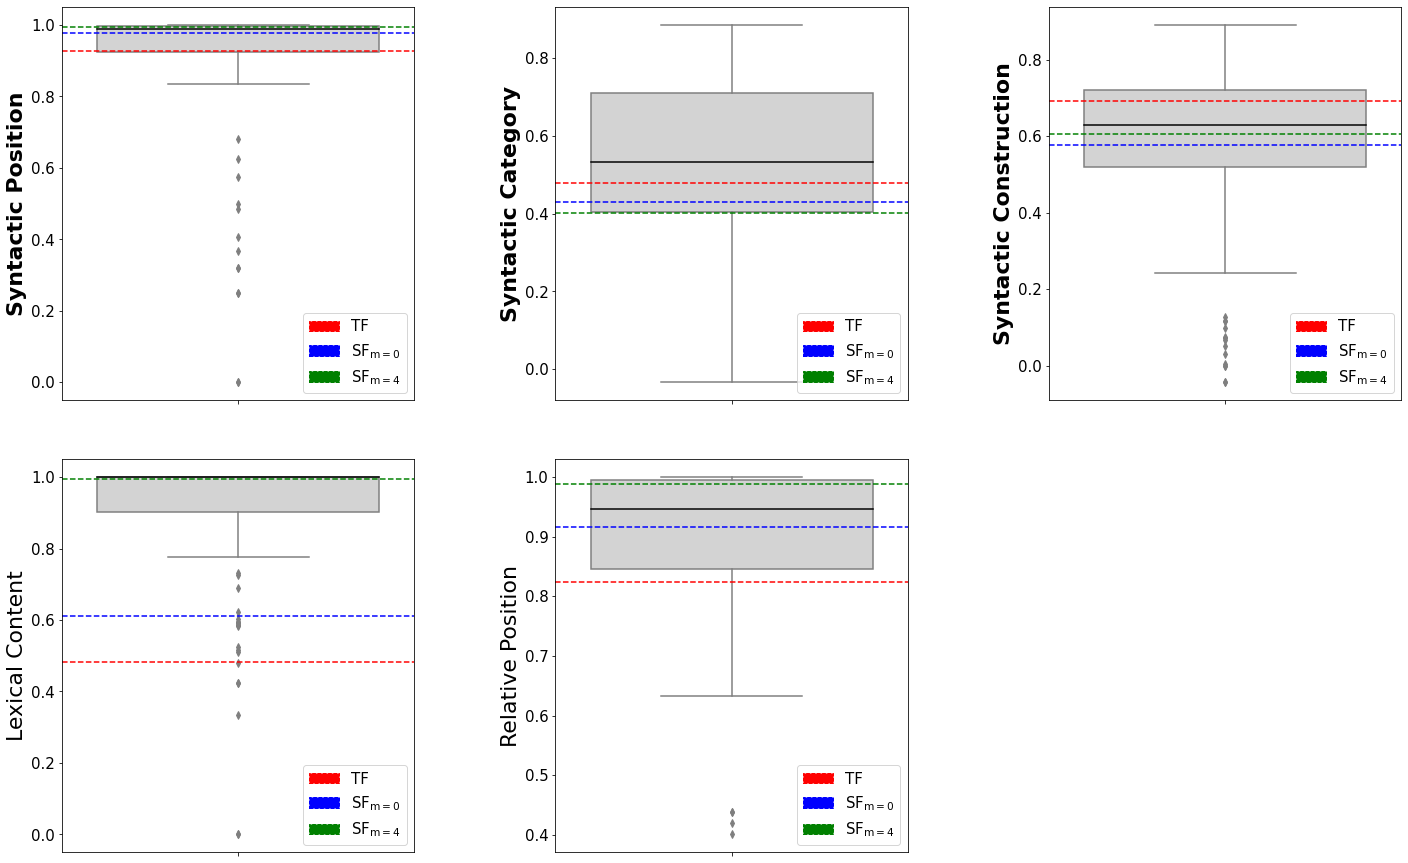

In [23]:
# Plot the boxplot and add legends
plt.figure(figsize=(16*1.5, 27*1.5))

for i, task in enumerate(control_experiments):
    plt.subplot(5, 3, i+1)
    ax = sns.boxplot(data=df[:-3], y=task, color='#D3D3D3', medianprops={'color': 'black'})
    ax.axhline(y=df[task].iloc[-3].item(), color='red', linestyle='--') # tf
    ax.axhline(y=df[task].iloc[-2].item(), color='blue', linestyle='--') # sf
    ax.axhline(y=df[task].iloc[-1].item(), color='green', linestyle='--') # sf_ip
    ax.tick_params(axis='y', labelsize=15)
    ax.legend(handles=[tf_patch, sf_patch, sf_ip_patch], loc='lower right', fontsize=15)
    font_weight = 'bold' if df[task].name in syntax_tasks else 'normal'
    if df[task].name.startswith('control_raising_control'):
        ax.set_ylabel("Syntactic Construction", fontsize=22, fontweight=font_weight)
    elif df[task].name.startswith('main_verb_control'):
        ax.set_ylabel("Syntactic Position", fontsize=22, fontweight=font_weight)
    elif df[task].name.startswith('syntactic_category_control'):
        ax.set_ylabel("Syntactic Category", fontsize=22, fontweight=font_weight)
    elif df[task].name.startswith('relative_position_control'):
        ax.set_ylabel("Relative Position", fontsize=22, fontweight=font_weight)
    elif df[task].name.startswith('lexical_content_the_control'):
        ax.set_ylabel("Lexical Content", fontsize=22, fontweight=font_weight)

plt.subplots_adjust(hspace=0.15, wspace=0.4) # Add space between subplots

plt.show()


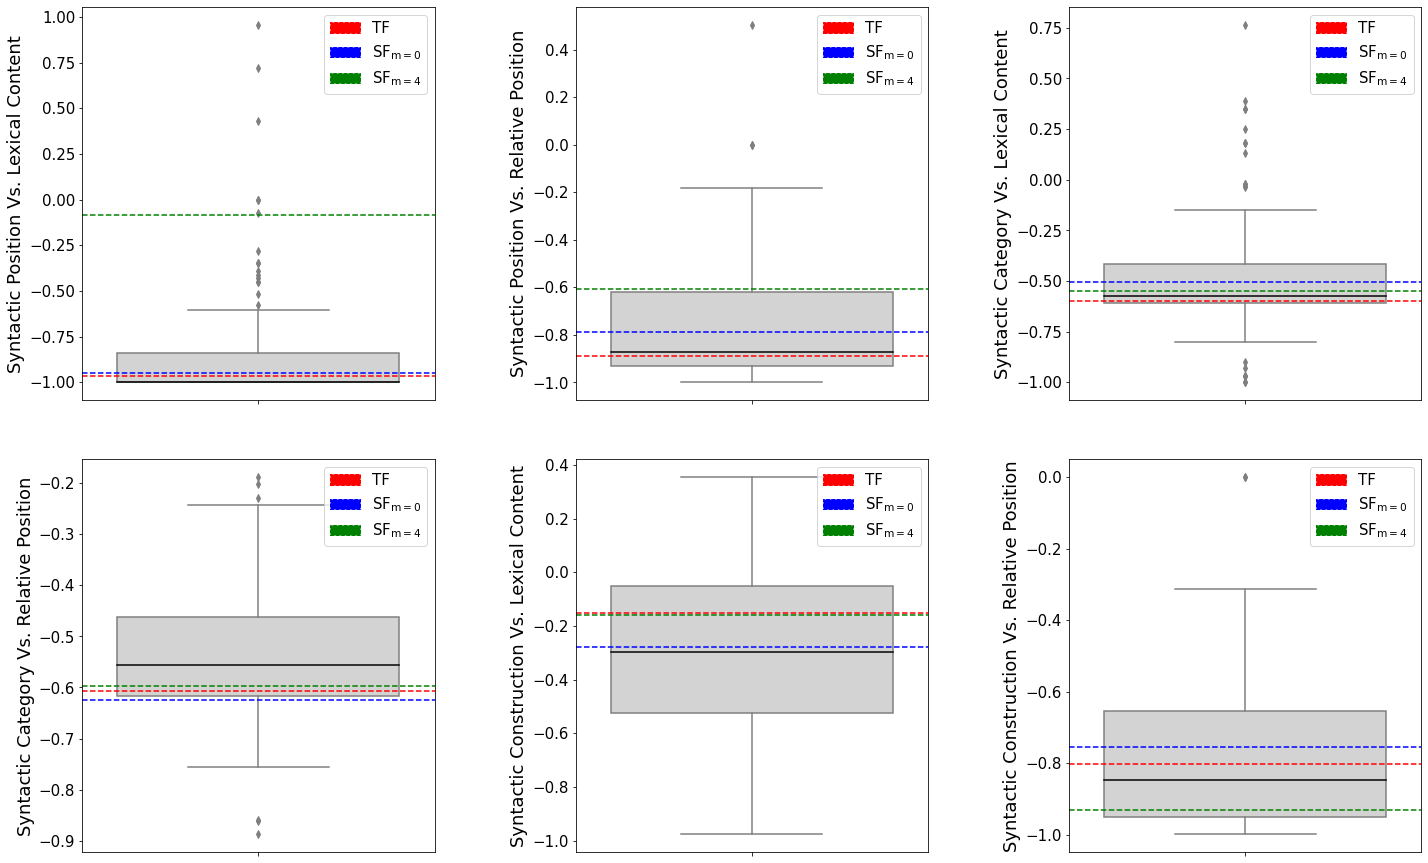

In [26]:
# Plot the boxplot and add legends
plt.figure(figsize=(16*1.5, 27*1.5))

for i, task in enumerate(pre_experiments):
    plt.subplot(5, 3, i+1)
    ax = sns.boxplot(data=df[:-3], y=task, color='#D3D3D3', medianprops={'color': 'black'})
    ax.axhline(y=df[task].iloc[-3].item(), color='red', linestyle='--') # tf
    ax.axhline(y=df[task].iloc[-2].item(), color='blue', linestyle='--') # sf
    ax.axhline(y=df[task].iloc[-1].item(), color='green', linestyle='--') # sf_ip
    ax.tick_params(axis='y', labelsize=15)
    ax.legend(handles=[tf_patch, sf_patch, sf_ip_patch], loc='upper right', fontsize=15)
    font_weight = 'normal' if df[task].name in syntax_tasks else 'normal'
    if df[task].name.startswith('control_raising_lexical_content_the'):
        ax.set_ylabel("Syntactic Construction Vs. Lexical Content", fontsize=18, fontweight=font_weight)
    elif df[task].name.startswith('control_raising_relative_token_position'):
        ax.set_ylabel("Syntactic Construction Vs. Relative Position", fontsize=18, fontweight=font_weight)
    elif df[task].name.startswith('main_verb_lexical_content_the'):
        ax.set_ylabel("Syntactic Position Vs. Lexical Content", fontsize=18, fontweight=font_weight)
    elif df[task].name.startswith('main_verb_relative_token_position'):
        ax.set_ylabel("Syntactic Position Vs. Relative Position", fontsize=18, fontweight=font_weight)
    elif df[task].name.startswith('syntactic_category_lexical_content_the'):
        ax.set_ylabel("Syntactic Category Vs. Lexical Content", fontsize=18, fontweight=font_weight)
    elif df[task].name.startswith('syntactic_category_relative_position'):
        ax.set_ylabel("Syntactic Category Vs. Relative Position", fontsize=18, fontweight=font_weight)
    
    
plt.subplots_adjust(hspace=0.15, wspace=0.4) # Add space between subplots

plt.show()


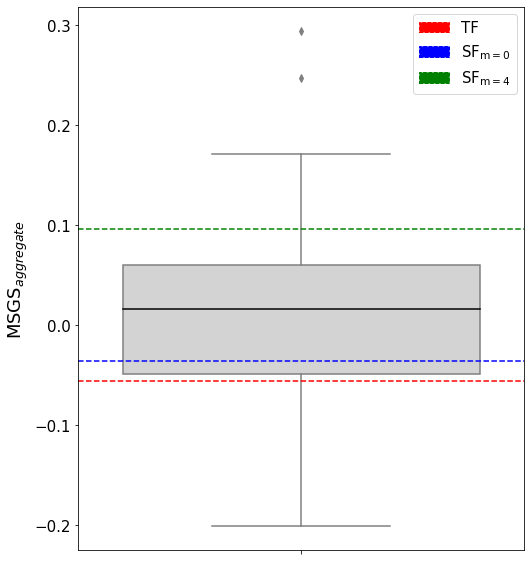

In [102]:
# Plot the boxplot and add legends
plt.figure(figsize=(8*1, 10*1))

task = 'msgs_ag'

ax = sns.boxplot(data=df[:-3], y=task, color='#D3D3D3', medianprops={'color': 'black'})
ax.axhline(y=df[task].iloc[-3].item(), color='red', linestyle='--') # tf
ax.axhline(y=df[task].iloc[-2].item(), color='blue', linestyle='--') # sf
ax.axhline(y=df[task].iloc[-1].item(), color='green', linestyle='--') # sf_ip
ax.tick_params(axis='y', labelsize=15)
ax.legend(handles=[tf_patch, sf_patch, sf_ip_patch], loc='upper right', fontsize=15)

ax.set_ylabel(r'MSGS$_{aggregate}$', fontsize=18, fontweight=font_weight) # Increase fontsize

#plt.subplots_adjust(hspace=0.15, wspace=0.4) # Add space between subplots

plt.show()


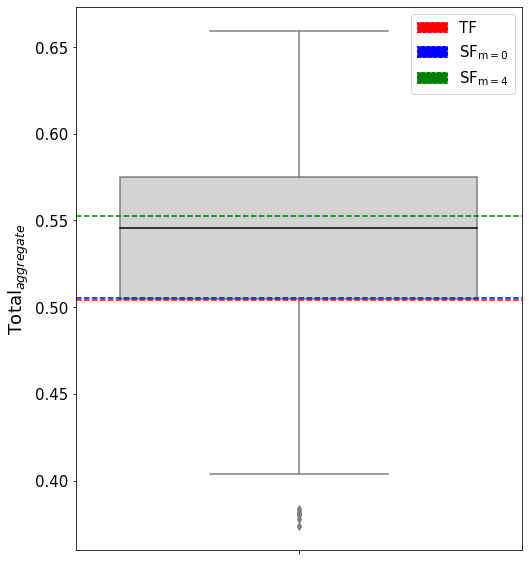

In [105]:
# Plot the boxplot and add legends
plt.figure(figsize=(8*1, 10*1))

task = 'total_ag'

ax = sns.boxplot(data=df[:-3], y=task, color='#D3D3D3', medianprops={'color': 'black'})
ax.axhline(y=df[task].iloc[-3].item(), color='red', linestyle='--') # tf
ax.axhline(y=df[task].iloc[-2].item()+0.001, color='blue', linestyle='--') # sf
ax.axhline(y=df[task].iloc[-1].item(), color='green', linestyle='--') # sf_ip
ax.tick_params(axis='y', labelsize=15)
ax.legend(handles=[tf_patch, sf_patch, sf_ip_patch], loc='upper right', fontsize=15)

ax.set_ylabel(r'Total$_{aggregate}$', fontsize=18, fontweight=font_weight) # Increase fontsize

#plt.subplots_adjust(hspace=0.15, wspace=0.4) # Add space between subplots

plt.show()


In [16]:
import re
lines = """
300M
300M
300M
300M
300M
1.55M
121M
121M
6.7M
6.7M
6.7M
6.7M
6.7M
6.7M
6.7M
125M
125M
128M
30M
16M
66M
435M
435M
435M
435M
455M
43.5M
98M
24M
118M
144M
110M
133M
133M
133M
133M
133M
144M
92M
94m
94m
58M
125M
126M
126M
126M
126M
126M
126M
350M
125M
125M
774M
98M
"""

numerical_values = []
for line in lines.split('\n'):
    numerical_values.extend(re.findall(r'\d+\.?\d*', line))

numerical_values = [float(value) for value in numerical_values]

print(set(numerical_values))


{128.0, 1.55, 133.0, 6.7, 774.0, 16.0, 144.0, 24.0, 30.0, 43.5, 300.0, 435.0, 58.0, 66.0, 455.0, 92.0, 94.0, 350.0, 98.0, 110.0, 118.0, 121.0, 125.0, 126.0}


In [17]:
len(numerical_values)

54

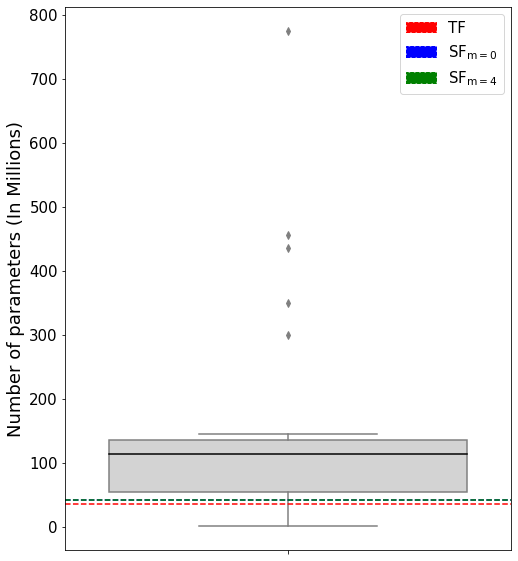

In [21]:
# Plot the boxplot and add legends
plt.figure(figsize=(8*1, 10*1))

ax = sns.boxplot(y=list(set(numerical_values)), color='#D3D3D3', medianprops={'color': 'black'})
ax.axhline(y=35, color='red', linestyle='--') # tf
ax.axhline(y=41.5, color='blue', linestyle='--') # sf
ax.axhline(y=41.5+0.5, color='green', linestyle='--') # sf_ip
ax.tick_params(axis='y', labelsize=15)
ax.legend(handles=[tf_patch, sf_patch, sf_ip_patch], loc='upper right', fontsize=15)

ax.set_ylabel(r'Number of parameters (In Millions)', fontsize=18, fontweight=font_weight) # Increase fontsize

#plt.subplots_adjust(hspace=0.15, wspace=0.4) # Add space between subplots

plt.show()


In [12]:
import re
lines = """
300M 0.517
1.55M 0.461
121M 0.644
6.7M 0.408
125M 0.730
128M 0.702
30M 0.575
16M 0.426
66M 0.484
435M 0.598
455M 0.613
43.5M 0.588
98M 0.743
24M 0.659
118M 0.580
144M 0.546
110M 0.437
133M 0.520
144M 0.516
92M 0.563
94m 0.479
58M 0.601
125M 0.366
126M 0.510
350M 0.547
125M 0.550
774M 0.557
97.7 0.374
"""

numerical_values = []
second_values = []

for line in lines.split('\n'):
    match = re.match(r'([\d.]+[A-Za-z]*)\s+([\d.]+)', line)
    if match:
        numerical_values.append(match.group(1))
        second_values.append(match.group(2))

print(numerical_values)
print(second_values)

['300M', '1.55M', '121M', '6.7M', '125M', '128M', '30M', '16M', '66M', '435M', '455M', '43.5M', '98M', '24M', '118M', '144M', '110M', '133M', '144M', '92M', '94m', '58M', '125M', '126M', '350M', '125M', '774M', '97.7']
['0.517', '0.461', '0.644', '0.408', '0.730', '0.702', '0.575', '0.426', '0.484', '0.598', '0.613', '0.588', '0.743', '0.659', '0.580', '0.546', '0.437', '0.520', '0.516', '0.563', '0.479', '0.601', '0.366', '0.510', '0.547', '0.550', '0.557', '0.374']


In [13]:
numbers = [float(re.findall(r'\d+\.?\d*', item)[0]) for item in numerical_values]

In [14]:
len(second_values), len(numbers)

(28, 28)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
